In [116]:
#pip install xgboost

In [ ]:
# Test SAra

In [148]:
# Libraries
import numpy as np
import pandas as pd
import warnings

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Stats
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm

# ML
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [34]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
data = pd.read_csv('king_ country_ houses_aa.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id: A unique identifier for a house.

date: The date on which the house was sold.

price: The sale price of the house (prediction target).

bedrooms: Number of bedrooms in the house.

bathrooms: Number of bathrooms in the house, per bedroom.

sqft_living: Square footage of the interior living space.

sqft_lot: Square footage of the land space.

floors: Number of floors (levels) in the house.

waterfront: Whether the house has a waterfront view.

view: Number of times the house has been viewed.

condition: The overall condition of the house.

grade: The overall grade given to the house, based on the King County grading system.

sqft_above: Square footage of the house apart from the basement.

sqft_basement: Square footage of the basement.

yr_built: The year the house was built.

yr_renovated: The year the house was renovated.

zipcode: ZIP code area.

lat: Latitude coordinate.

long: Longitude coordinate.

sqft_living15: The interior living space for the nearest 15 neighbors in 2015.

sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.

TARGET --> Price: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

In [3]:
# Copy dataframe
df = data.copy()

In [4]:
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# possible categorical data
"""
COLUMNS:
view (0,1,2,3,4)
waterfront (0,1)

"""

'\nCOLUMNS:\nview (0,1,2,3,4)\nwaterfront (0,1)\n\n'

In [9]:
df.date

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [10]:
# DATA CLEANING
df['date_format'] = pd.to_datetime(df['date'], format ='%Y%m%dT%H%M%S') # convert to date format  
df.insert(0, 'date_format', df.pop('date_format')) # locate date column in the front


# Drop columns
df.drop(columns=['id'],inplace=True)
df.drop(columns=['date'],inplace=True)

# Set it as index
df.set_index('date_format', inplace=True)

In [11]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
round(df.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


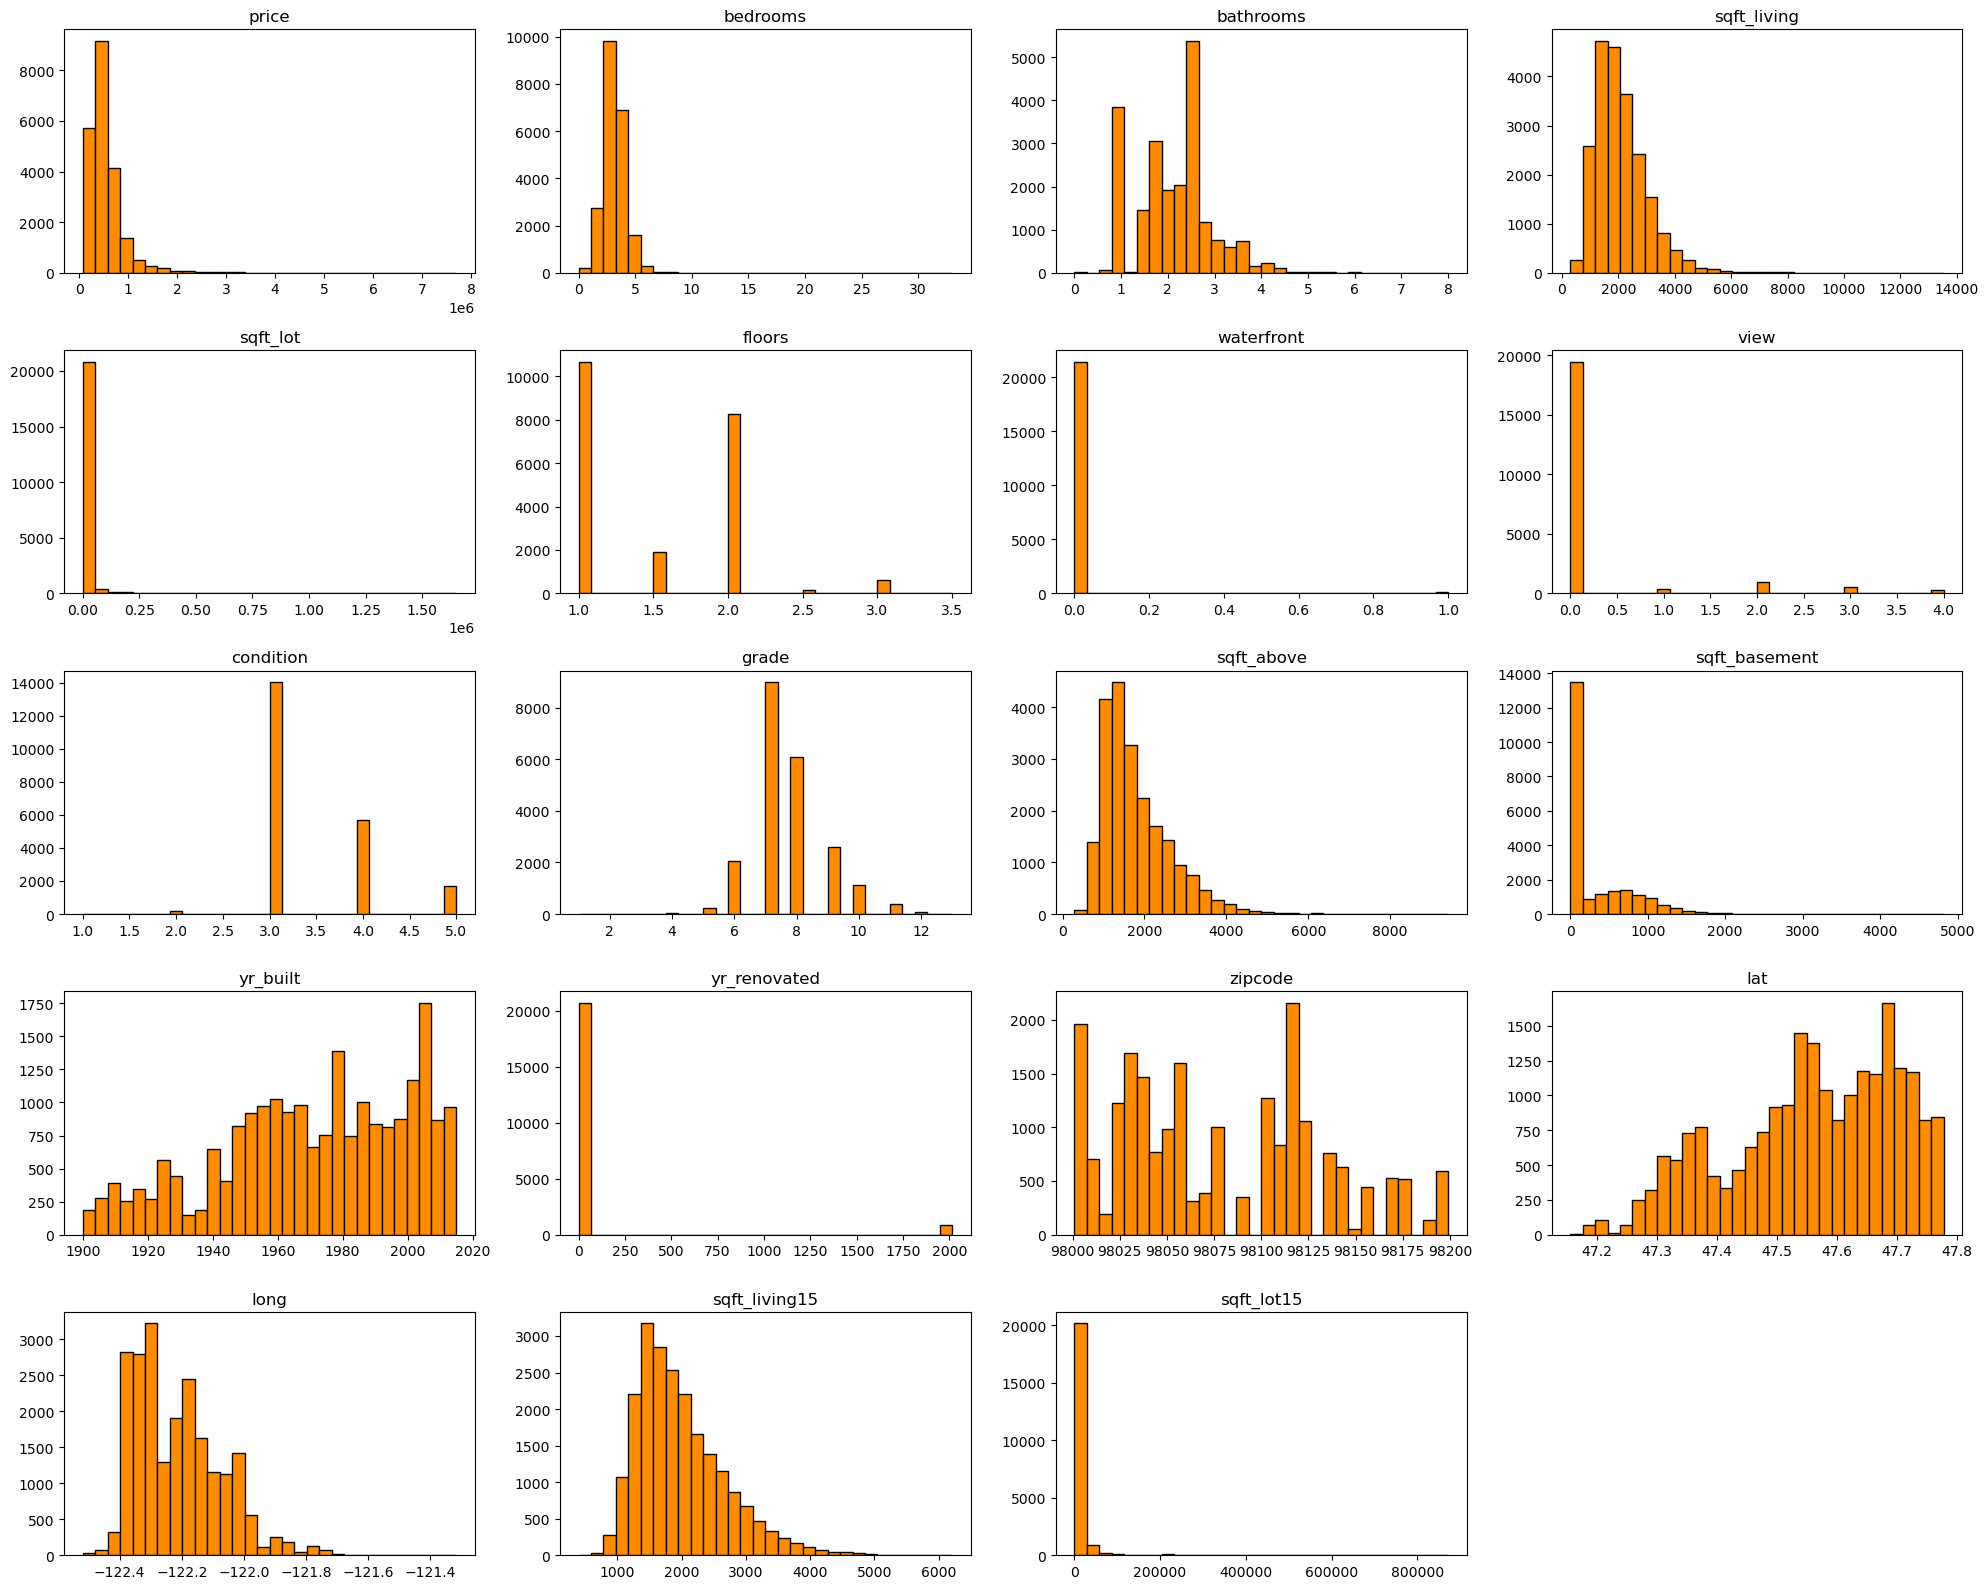

In [13]:
# Checking Distributions
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

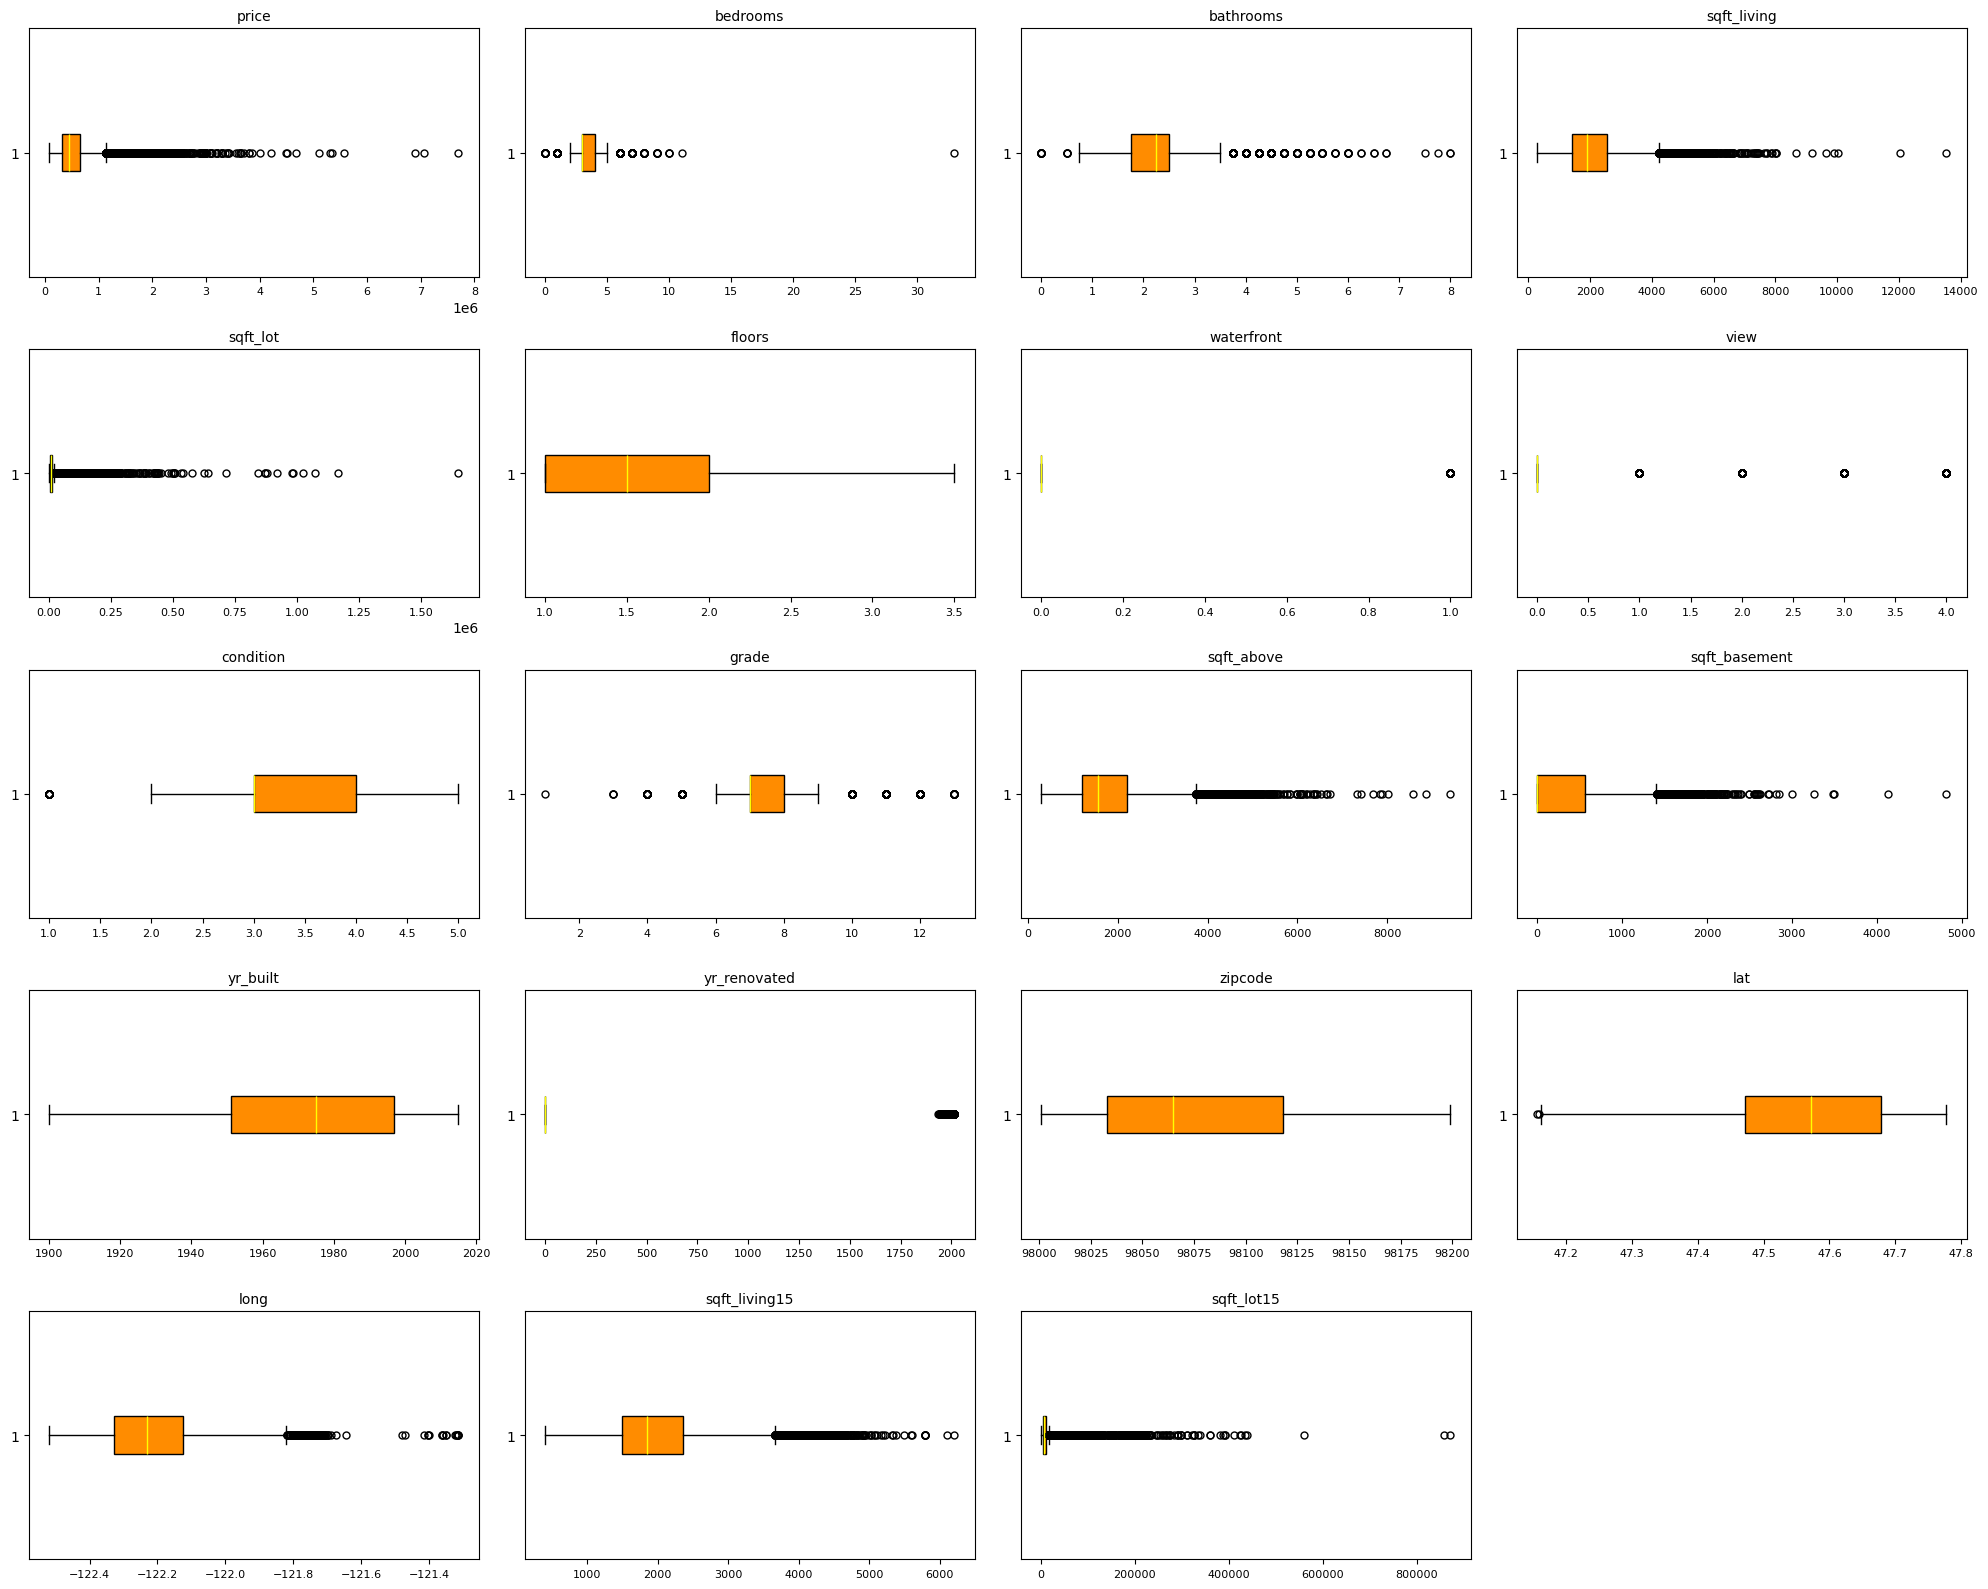

In [14]:
# Checking Outliers
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

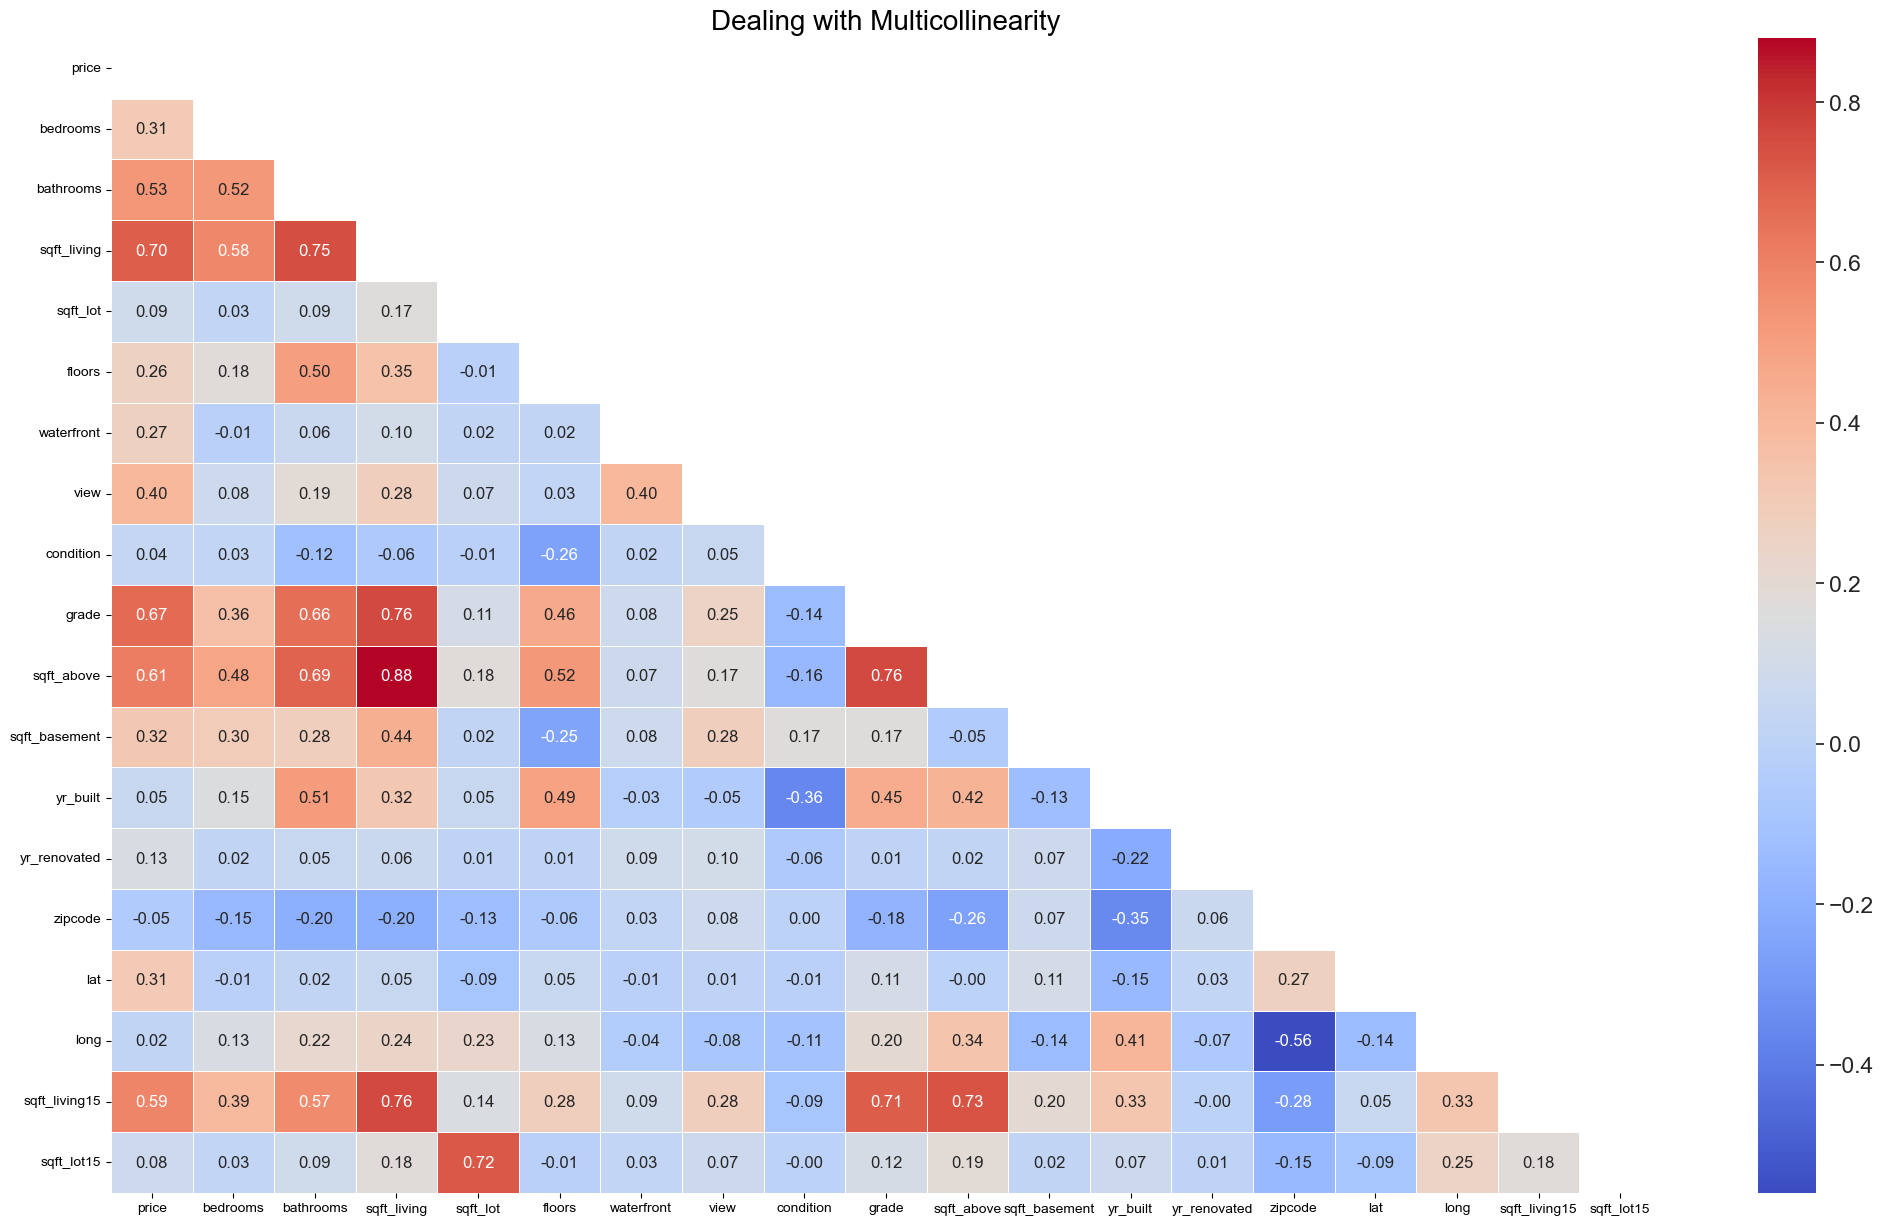

In [15]:
# Checking Multicollinearity
num_corr = round(df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [38]:
#X-y split
X = df.drop("price", axis=1)
y = df["price"]

In [40]:
#Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


In [52]:
#Linear regression
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
#Model validation
# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

array([ 458597.06764176,  748993.75994828, 1243303.75799055, ...,
        378358.01428258,  814280.5596961 ,  582157.52856974])

In [56]:
# Make a dataframe to compare
eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
date_format,,
2014-10-06,365000.0,4.585971e+05
2014-08-21,865000.0,7.489938e+05
2014-08-15,1038000.0,1.243304e+06
2015-03-31,1490000.0,1.665117e+06
2014-07-14,711000.0,7.373021e+05
...,...,...
2014-12-03,412000.0,5.226694e+05
2015-04-07,760000.0,6.565664e+05
2014-10-23,410500.0,3.783580e+05


In [58]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
date_format,,,
2014-10-06,365000.0,4.585971e+05,93597.067642
2014-08-21,865000.0,7.489938e+05,116006.240052
2014-08-15,1038000.0,1.243304e+06,205303.757991
2015-03-31,1490000.0,1.665117e+06,175116.950954
2014-07-14,711000.0,7.373021e+05,26302.057417


In [60]:
mae = np.mean(eval_df["dif"])
mae

127486.80255716333

In [66]:
#Metric
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [68]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.6995
RMSE =  208296.7277
MSE =   43387526779.3577
MAE =  127486.8026


In [72]:
#Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [74]:
#model validation
predictions_ridge = ridge.predict(X_test)

In [76]:
#Metrics
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [78]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6994
RMSE =  208329.8193
The value of the metric MSE is  43401313591.117
MAE =  127479.648


In [82]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [84]:
#model validation
predictions_lasso = lasso.predict(X_test)

In [86]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [88]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6995
RMSE =  208297.9015
The value of the metric MSE is  43388015761.7388
MAE =  127486.3114


In [92]:
#Decision tree regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [94]:
predictions_tree = tree.predict(X_test)

In [96]:
#Metrics
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [98]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.7403
RMSE =  193614.8564
The value of the metric MSE is  37486712634.7497
MAE =  101557.743


In [102]:
#KNN regression
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [104]:
predictions_knn = knn.predict(X_test)

In [106]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [108]:
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.4932
RMSE =  270495.0558
The value of the metric MSE is  73167575226.5868
MAE =  164982.8095


In [118]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [120]:
predictions_xgb = xgbr.predict(X_test)

In [122]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [124]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7671
RMSE =  183347.2825
The value of the metric MSE is  33616225987.4677
MAE =  100507.1812


In [126]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6],
    'MSE': [MSE_3, MSE_3_2, MSE_3_3, MSE_3_4, MSE_3_5, MSE_3_6],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6]
}

In [144]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T
pd.options.display.float_format = '{:.2f}'.format
df_metrics

,Model,R²,RMSE,MSE,MAE
0,Linear Regression,0.70,208296.73,43387526779.36,127486.80
1,Ridge,0.70,208329.82,43401313591.12,127479.65
2,Lasso,0.70,208297.90,43388015761.74,127486.31
3,Decision Tree,0.74,193614.86,37486712634.75,101557.74
4,KNN,0.49,270495.06,73167575226.59,164982.81
5,XGBoost,0.77,183347.28,33616225987.47,100507.18


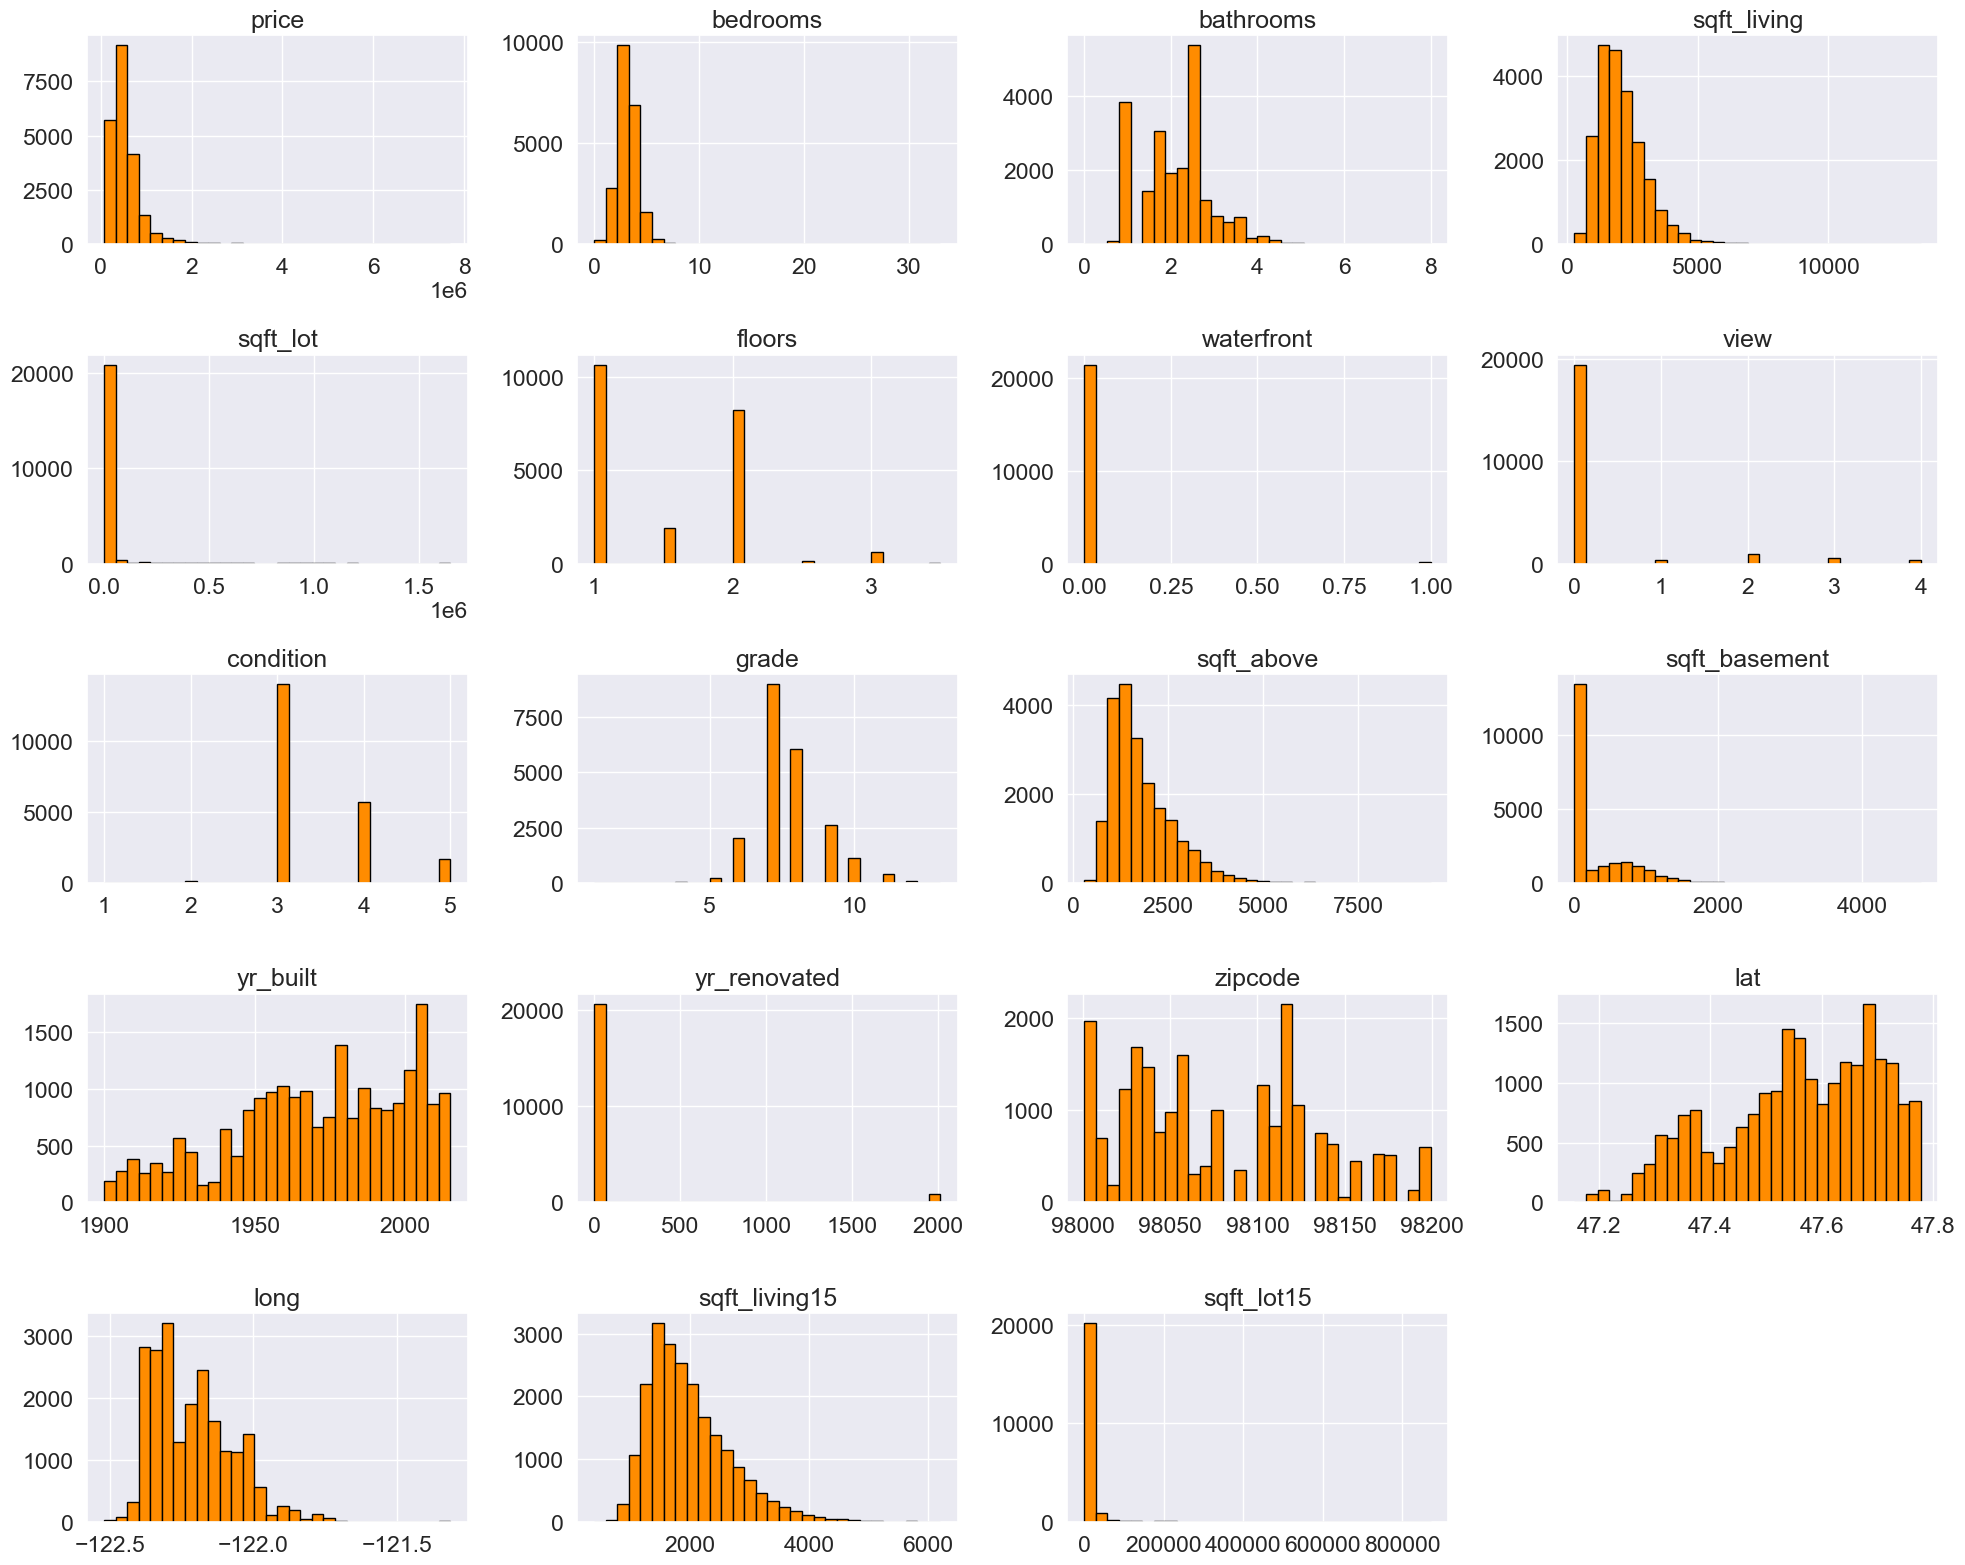

In [146]:
#Noramlization with MinMax Scale
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [150]:
#Normalization with log Transform
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [152]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [154]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.7199
RMSE =  201077.3679
The value of the metric MSE is  40432107869.8466
MAE =  104127.4844


In [158]:
#Improving it droppign multicollinearity features
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
view             0.40
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.27
floors           0.26
yr_renovated     0.13
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
long             0.02
zipcode         -0.05
dtype: float64

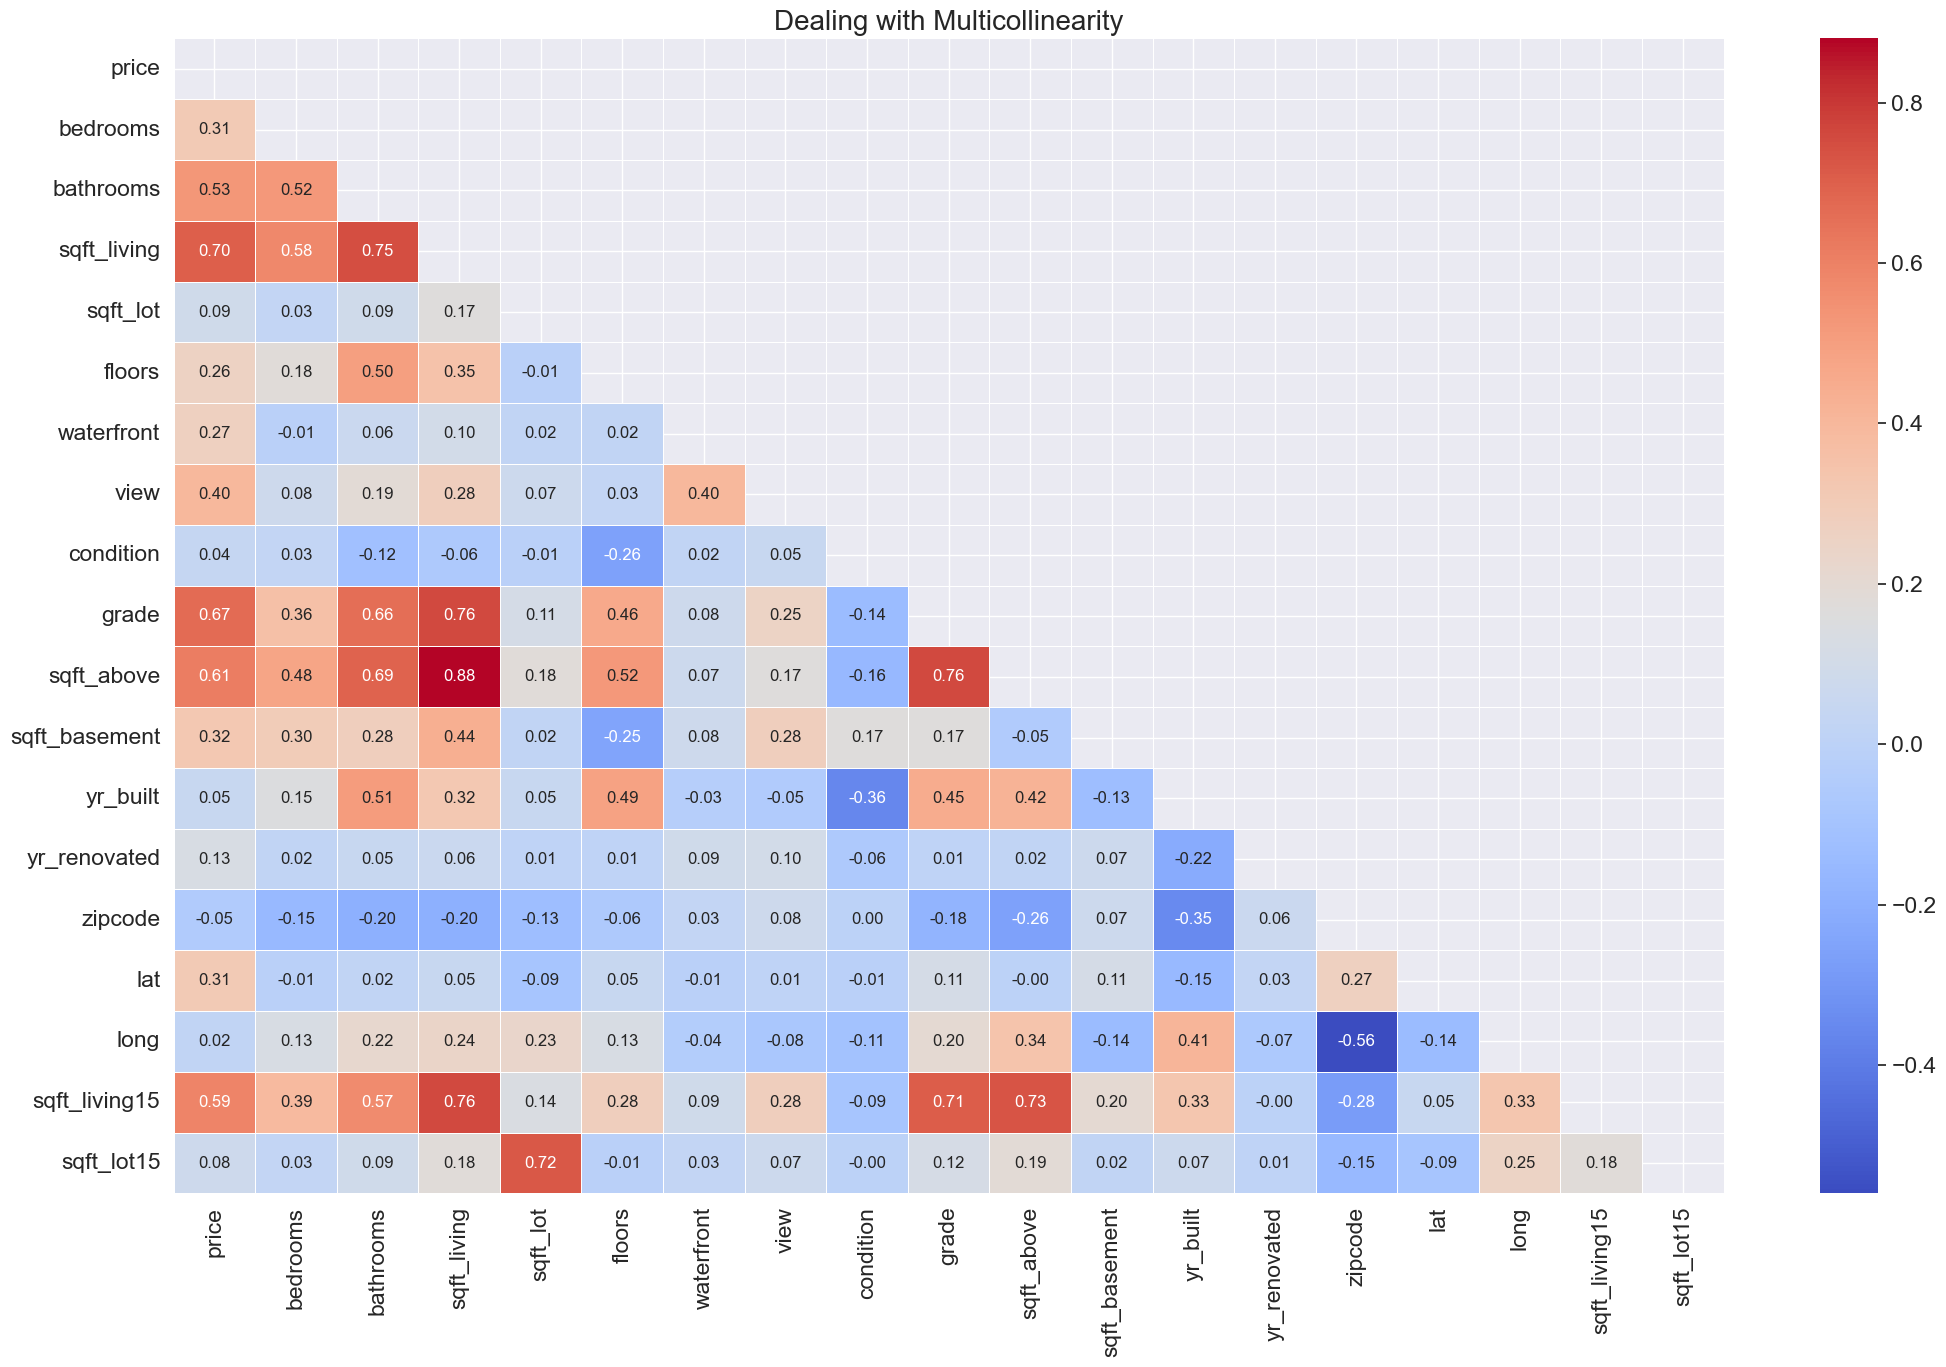

In [160]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [162]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [164]:
df.shape

(21613, 19)

In [166]:
#Log transfer
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [168]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [170]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = mean_squared_error(y_test, predictions_xgb_2, squared=False)
MSE_3_7 = mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("The value of the metric MSE is ", round(MSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.7199
RMSE =  201077.3679
The value of the metric MSE is  40432107869.8466
MAE =  104127.4844


In [172]:
# Dealing with outliers
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [174]:
# Reporting
eval_df

,actual,pred,dif
date_format,,,
2014-10-06,365000.00,458597.07,93597.07
2014-08-21,865000.00,748993.76,116006.24
2014-08-15,1038000.00,1243303.76,205303.76
2015-03-31,1490000.00,1665116.95,175116.95
2014-07-14,711000.00,737302.06,26302.06
...,...,...,...
2014-12-03,412000.00,522669.38,110669.38
2015-04-07,760000.00,656566.44,103433.56
2014-10-23,410500.00,378358.01,32141.99


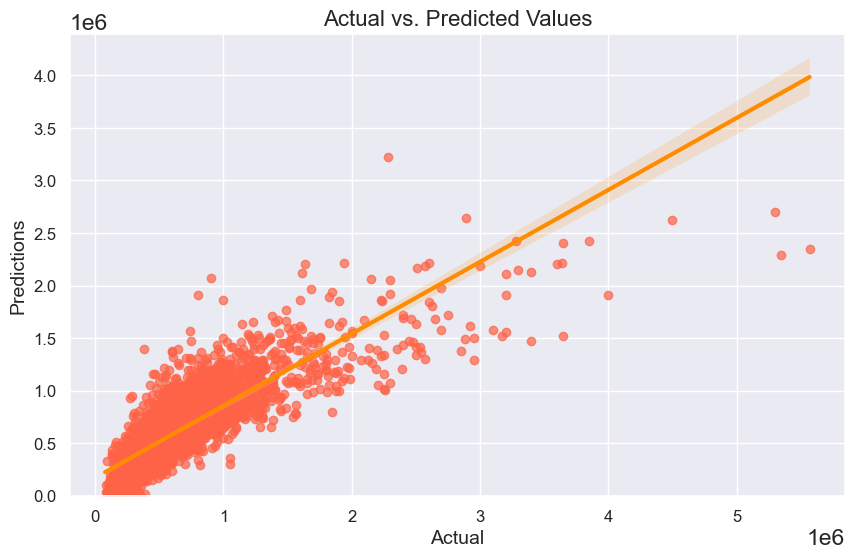

In [176]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()